In [5]:
import sys
from fastai.vision import *
from fastai.vision import Image
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
import cv2
from matplotlib import pyplot as plt
import numpy as np
import PIL

In [6]:
def acc_trachea(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)==target).float().mean()

def bgr_to_tensor(frame):
    return 1 - torch.tensor(np.ascontiguousarray(np.flip(frame, 2)).transpose(2,0,1)).float()/255
def tensor_to_bgr():
    return 

In [7]:
learn = None
cap = None
out = None

    #     def setup(self):
metrics=acc_trachea


path = Path('/storage')
path_lbl = path/'vocal_cords_and_rings_data/data/labels'
path_img = path/'vocal_cords_and_rings_data/data/images'
path_lbl = path_lbl.resolve()
path_img = path_img.resolve()

get_y_fn = lambda x: path_lbl/f'{x.stem}{x.suffix}'


In [8]:
codes = np.loadtxt(path_lbl/'../../codes.txt', dtype=str);
bs = 4
wd=1e-2


src = (SegmentationItemList.from_folder(path_img)
        .split_by_fname_file('../../valid.txt')
        .label_from_func(get_y_fn, classes=codes))
data = (src.transform(get_transforms(flip_vert=True), size=224, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))
        #Create empty data object
#         data = ImageDataBunch.single_from_classes(path_img, codes, tfms=get_transforms(), size=224).normalize(imagenet_stats)

learn = unet_learner(data, models.resnet34)#, metrics=metrics, wd=wd)
learn.load('stage-2-big-0606')

#Read in video and process frame by frame

        
#         writer = VideoWriter('/storage/vocal_chords_and_rings_data/data/videos/output2.avi', frameSize=(224,224))
#         writer.open()

Learner(data=ImageDataBunch;

Train: LabelList (104 items)
x: SegmentationItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: SegmentationLabelList
ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224)
Path: /storage/vocal_cords_and_rings_data/data/images;

Valid: LabelList (19 items)
x: SegmentationItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: SegmentationLabelList
ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224)
Path: /storage/vocal_cords_and_rings_data/data/images;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [9]:
def float_to_uint(output):
    print("OUTPUT DTYPE: {}".format(output.dtype))
    info = np.finfo(output.dtype) # Get the information of the incoming image type
    output = output.astype(np.float64) / info.max # normalize the data to 0 - 1
    output = 255 * output # Now scale by 255
    ret = output.astype(np.uint8)
    return ret
    
def overlay_mask(img, mask, show=False):
    output = np.zeros((224,224))
    alpha = 0.6
    beta = (1-alpha)

#     mask2 = cv2.cvtColor(mask*10, cv2.COLOR_BGR2HLS)
    output = cv2.addWeighted(img, alpha, mask.astype('float'), beta, 0.0)
    
    if show:
        rgb_ = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_)
        plt.show()
    
    # Convert to uint for saving
    
    return output

In [10]:
from skimage.transform import resize
def crop_img(img,cropx,cropy):
    cropx=np.min(img.shape[:2])
    cropy=cropx
#     print(img.shape[:2])
    y,x = img.shape[:2]
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return resize(img[starty:starty+cropy,startx:startx+cropx], (224,224),anti_aliasing=True)

In [11]:
def mask_to_colour(mask,colour=[0,255,0]):
#     print("UNIQUE MASK {}".format(np.unique(mask)))
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    output_mask = np.zeros((mask.shape[0],mask.shape[1],3)).astype(np.uint8)
    green = [0,255,0]
    red = [255,0,0]
    blue = [0,0,255]
    other = [150,200,0]
    output_mask[mask==1]=red
    output_mask[mask==2]=green
    output_mask[mask==3]=blue
    return output_mask
# mask2[mask2>0]=mask_green
# print(mask2.shape)
# plt.imshow(output_mask)
# mask_green = np.concatenate(zeros, colour, zeros)
# np.dstack(mask_green,)
# plt.imshow(mask2)
# blue = img[y,x,0]
#     green = img[y,x,1]
#     red = img[y,x,2]


In [21]:
print ("Starting!")
cap = cv2.VideoCapture('/storage/vocal_cords_and_rings_data/nbs/20181010_12y_5031752 mild subglottic stenosis uneditted.mpg')
out = cv2.VideoWriter('/storage/vocal_cords_and_rings_data/nbs/output_masked_new.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30.0, (224,224))
print ("Cap fps: {}".format(cap.get(cv2.CAP_PROP_FPS)))
ctr = 0

while(cap.isOpened() and ctr >-1):#ctr <5640):
#     if ctr > 5639:
#         for i in range (0, 5300): #up until 2:56 in the video
#             ctr+=1
#             print(ctr)
#             ret, frame = cap.read()
    

    ctr+=1
    print(ctr)
    
    ret, frame = cap.read()
    if np.shape(frame) == (): #i.e. empty frame
        break
        
#     print(frame.shape)
#     frame = crop_img(frame,224,224)
#     print(frame.shape)
#     plt.imshow(frame)
            
    #Convert from OpenCV image to pytorch tensor, to Image
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    t = PIL.Image.fromarray(frame_rgb)
    t = pil2tensor(t.convert("RGB"), np.float32).div_(255)
    t = Image(t)
    
    #Predict
    prediction = learn.predict(t)
#     print("PRED SHAPE: {}".format(prediction))
    p = prediction[1] #prediction data
    p1 = np.array(p)
    p1.astype('uint8')

    p3 = p1
    p3 = p3.squeeze()
#     print("p3shape: {}".format(p3.shape))
#     plt.imshow(p3)
#     plt.title('frame # {}'.format(ctr))
#     plt.show()

    
    p4 = np.expand_dims(p3, axis=2)
    p4 = p4.astype('uint8')
#     mask=p4
    mask = cv2.cvtColor(p4, cv2.COLOR_GRAY2BGR)
    mask = mask_to_colour(mask)
#     plt.imshow(mask)
    
    cr=crop_img(frame,224,224)
#     print(cr.shape)
#     plt.imshow(crop_img(frame,224,224))
    
#     ov=overlay_mask(cr, mask)
#     print(ov.dtype)
#     plt.imshow((ov*255.0).astype('uint8'))
#     plt.imshow(ov)
#     print("UNI: {}".format(np.unique(ov)))
#     cv2.imwrite('/storage/vocal_chords_and_rings_data/nbs/ov.png',ov)
#     plt.imshow(cv2.cvtColor(mask*50, cv2.COLOR_BGR2HLS), alpha=0.5)
#     frame.dtype = 'uint8'
#   out.write(mask)

    #Save the overlaid frame
    ov=overlay_mask(cr, mask)
#     out.write((ov*255.0).astype('uint8'))
    out.write((ov).astype('uint8'))
    
cap.release()
out.release()
print ("End!")

Starting!
Cap fps: 29.97002997002997
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108


KeyboardInterrupt: 

In [22]:
out.release()

# Evaluate the saved video

In [ ]:
# print ("Starting!")
cap = cv2.VideoCapture('/storage/vocal_cords_and_rings_data/data/videos/20180825_9m_2771576_bilateralsu.avi')
out = cv2.VideoWriter('/storage/vocal_cords_and_rings_data/data/videos/output_masked.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30.0, (224,224))
print ("Cap fps: {}".format(cap.get(cv2.CAP_PROP_FPS)))
ctr = 0
while(cap.isOpened() and ctr <5640):
    if ctr < 5298:
        for i in range (0, 5300): #up until 2:56 in the video
            ctr+=1
            print(ctr)
            ret, frame = cap.read()
    
    #starting 
    print ('!!!!!!!!STARTING!!!!!!!!!')
    ctr+=1
    print(ctr)
    mask = 
    out.write(overlay_mask(frame, mask))
    

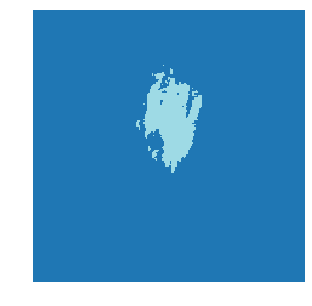

In [82]:
mask = open_mask('/storage/vocal_cords_and_rings_data/data/videos/mask_5421.png')
mask.show(figsize=(5,5), alpha=1)

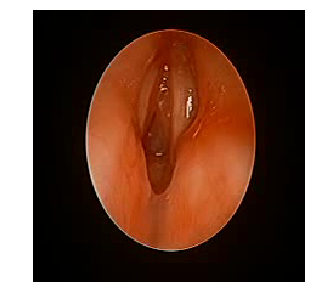

In [83]:
cv2img = cv2.imread('/storage/vocal_cords_and_rings_data/data/videos/frame_5421.png')
img = open_image('/storage/vocal_cords_and_rings_data/data/videos/frame_5421.png')
img.show(figsize=(5,5))
# np.unique(mask.data)
# image.show()

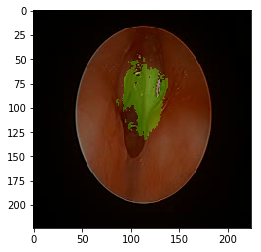

In [84]:
# img = np.asarray(img.data, 'uint8')

# mask = open_mask('/storage/vocal_chords_and_rings_data/data/videos/mask_5421.png')
# mask = np.asarray(mask.data, 'uint8')

# idx1 = (mask==2)
# mask2 = np.zeros((224, 224))
# mask2 = mask[idx1]
# np.unique(mask2), mask.shape, np.unique(mask), np.unique(idx1*1), idx1.shape
mask = cv2.imread('/storage/vocal_cords_and_rings_data/data/videos/mask_5421.png')
img = cv2.imread('/storage/vocal_cords_and_rings_data/data/videos/frame_5421.png')

output = np.zeros((224,224))
alpha = 0.6
beta = (1-alpha)

mask2 = cv2.cvtColor(mask*100, cv2.COLOR_BGR2HLS)
output = cv2.addWeighted(img, alpha, mask2, beta, 0.0)

np.unique(output)

rgb_ = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_)

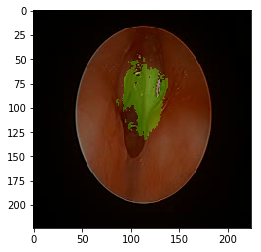

In [250]:
rgb_ = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_)

In [237]:
alpha = 0.5
# w = h = 224

red_img = np.zeros((h,w,3), np.uint8)
red_img[:,:] = (0,0,255)
red_img = np.transpose(red_img, (2,1,0))

In [164]:

# img[mask.data==2] = (0, 0, 255)
# overlay = img.copy()
# overlay = cv2.bitwise_and(img, img, mask=mask.np.masked_where)
# overlay[mask.data==2] = (0, 0, 255)
# overlay = img[0][mask.data==2]



# print(red_img.shape)
# print(img.shape)

# img=(img*(1-alpha)+alpha*red_img)
# output = img.copy()
# overlay = img.copy()
# cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
output = cv2.bitwise_and(img,idx*1) #times 1 for explicit conversion from bool to int
output = np.transpose(output, (2,1,0))

# from PIL import Image as IMAGE
# im = IMAGE.fromarray(img)

# plt.imshow(np.transpose(output, (2,1,0)))
# plt.title('overlaid')
# plt.show()


# overlay.shape, img.shape, mask.shape

In [167]:
import PIL.Image as IMAGE
im = IMAGE.fromarray(output)
# im.show()

from matplotlib.pyplot import imshow as imsh
imsh(im)
np.unique(im)

array([0], dtype=uint8)

In [147]:
alpha = 0.5
output = img.copy()
cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

array([[[  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0]],

       [[  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0],
        [  0,   0,   0,   0, ...,   0,   0,   0,   0]],

       [[223, 223, 223, 223, ..., 223, 223, 223, 223],
        [223, 223, 223, 223, ..., 2

# Evaluate Frame by Frame (Debugging)

In [71]:
??open_image
# ??ImageBBox
# ??ImagePoints
# ??Image

In [6]:
frame = cv2.imread(str(path/'vocal_cords_and_rings_data/data/videos/frame_5410.png'), cv2.IMREAD_COLOR)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#rgb_ = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# plt.imshow(frame)
# t = bgr_to_tensor(frame)

t = PIL.Image.fromarray(frame)
t = pil2tensor(t.convert("RGB"), np.float32).div_(255)
t_new = Image(t)


torch.Size([1, 224, 224])


Text(0.5, 1.0, 'histogram')

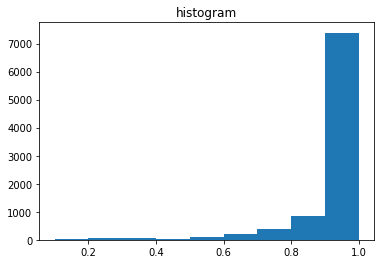

In [21]:
#Predict
prediction = learn.predict(t_new)
# print("PRED SHAPE: {}".format(prediction))
p = prediction[1] #prediction data
p1 = np.array(p)
p1.astype('uint8')

p3 = p1
p3 = p3.squeeze()
#     print("p3shape: {}".format(p3.shape))
#     plt.imshow(p3)
#     plt.title('frame # {}'.format(ctr))
#     plt.show()

    
p4 = np.expand_dims(p3, axis=2)
p4 = p4.astype('uint8')
mask = cv2.cvtColor(p4, cv2.COLOR_GRAY2BGR)

#TESTS:
print(prediction[1].size())
a = np.unique(np.array(prediction[2][0]))

plt.hist(a, bins = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) 
plt.title("histogram") 


# print (prediction[2][0])
# im_mask = PIL.Image.fromarray(mask*100)
# im_mask
# overlay = PIL.Image.fromarray(overlay_mask(frame, mask))
# overlay

### This histogram shows that the network is fairly confident in its predictions

In [130]:
??learn.predict